**Project Title: Credit Card Fraud Detection**<br>
File No: 03

**Principal Component Analysis**

This notebook explores dimensionality reduction through Principal Component Analysis (PCA) for the credit card fraud detection dataset. Various machine learning models, including Logistic Regression, AdaBoost, Gradient Boosting, and XGBoost, were trained on both the full and PCA-reduced datasets. The effect of PCA on model performance was evaluated to balance model accuracy and computational efficiency.

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load dataset- creditcard.csv
df = pd.read_csv("/content/drive/MyDrive/Data Science Project/Credit Card Fraud Detection /creditcard.csv")


In [4]:
#view all columns
pd.set_option("display.max_columns",None)
#to display first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Separate independent variable (input variable) X and dependent variable (output/ target variable) Y
X = df.drop("Class",axis=1) #to store all the input variable sin X apart from 'Class'
Y = df["Class"]             # to store only 'Class' column

In [6]:
# Split our dataset in train and test of size 70% and 30%
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [7]:
# importing the required modules
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
Y_train.value_counts()

,count
Class,
0,199007
1,357


In [9]:
# Creatting object of RandomOverSampler
ros = RandomOverSampler()

In [10]:
X_train_sample,Y_train_sample = ros.fit_resample(X_train,Y_train)

X_test_sample,Y_test_sample = ros.fit_resample(X_test,Y_test)

In [11]:
pd.Series(Y_train_sample).value_counts()

,count
Class,
0,199007
1,199007


In [12]:
pd.Series(Y_test).value_counts()

,count
Class,
0,85308
1,135


In [13]:
pd.Series(Y_test_sample).value_counts()


,count
Class,
0,85308
1,85308


In [14]:
# Create object of SatndardSacler
ss = StandardScaler()

In [15]:
X_train_sample = ss.fit_transform(X_train_sample)
X_test_sample = ss.fit_transform(X_test_sample)

In [16]:
X_train_sample

array([[ 0.87200458,  0.41342563, -0.4438166 , ..., -0.0840692 ,
        -0.04184249, -0.36262743],
       [ 0.26296739,  0.44676823, -0.22654629, ..., -0.16522939,
        -0.00756896, -0.38500245],
       [ 1.51376217,  0.80976492, -0.47797239, ..., -0.13995425,
        -0.19192455, -0.41425249],
       ...,
       [-0.95406494, -2.4570057 ,  1.72850931, ..., -1.99610921,
        -2.37941316,  1.09495761],
       [ 1.09381558,  0.52905291, -0.21138837, ...,  0.73704647,
         0.72614942,  0.07974809],
       [-0.69934597,  0.15703284, -0.1689209 , ...,  0.29809428,
         0.15558038,  0.04603972]])

In [17]:
# Create object of PCA class
pc = PCA(n_components=None,random_state=1)
# n_components : inbuilt paramter, here pass no. of components = 'None' means PC here total input features i.e. 29

In [18]:
X_train_pc = pc.fit_transform(X_train_sample)  # For training

In [19]:
X_test_pc = pc.transform(X_test_sample)        #for testing

In [20]:
explained_variance = pc.explained_variance_ratio_
print(explained_variance)     #automatically arrange variance in descending order

[3.82367204e-01 9.57499168e-02 8.23145328e-02 5.36611309e-02
 5.14807490e-02 4.17403939e-02 3.55238170e-02 3.37548145e-02
 3.05622682e-02 2.74214723e-02 2.55635740e-02 2.18502226e-02
 2.04872407e-02 1.87854403e-02 1.33471751e-02 1.30904082e-02
 1.02955492e-02 8.19899281e-03 7.65272600e-03 5.45479945e-03
 4.27139565e-03 3.80024870e-03 2.68834076e-03 2.49118199e-03
 1.85280157e-03 1.68920221e-03 1.47423147e-03 1.27168859e-03
 8.35692405e-04 3.22789131e-04]


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# create object of PCA class
pc1 = PCA(n_components=5,random_state=1)
# n_components : inbuilt paramter, here pass no. of components =5 which means PC here total input features i.e. 29

In [23]:
X_train_pc1 = pc1.fit_transform(X_train_sample)   #for training
X_test_pc1 = pc1.transform(X_test_sample)         #for tetsing

In [24]:
variance = pc1.explained_variance_ratio_
print(variance)    #automatically arranges variance in descending order

[0.3823672  0.09574992 0.08231453 0.05366113 0.05148075]


Classification algorith<br>
**Logistic Regression**

In [25]:
# creating object of LogisticRegression class
lr = LogisticRegression()

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
# creating a user defined function

def create_model(model):
  model.fit(X_train_pc1,Y_train_sample)
  Y_pred = model.predict(X_test_pc1)
  print(classification_report(Y_test_sample,Y_pred))
  print("Cofusion Matrix: ")
  print(confusion_matrix(Y_test_sample,Y_pred))
  return model

In [28]:
# caling the function
create_model(lr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.85      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Cofusion Matrix: 
[[82937  2371]
 [12649 72659]]


LogisticRegression()

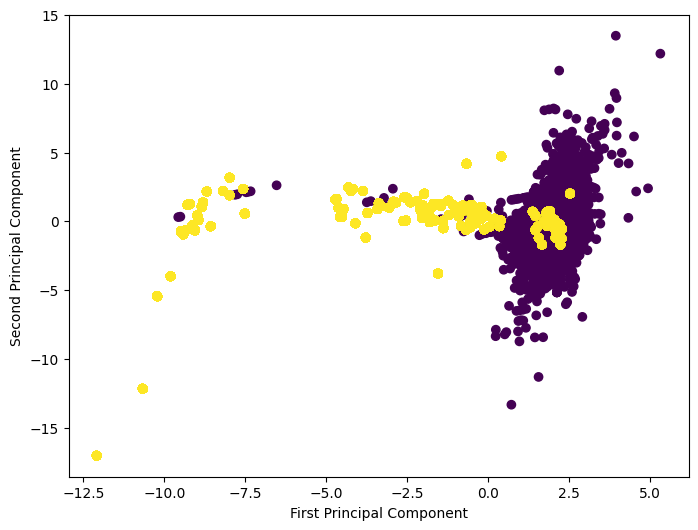

In [29]:
# Plotting a scatter plot
plt.figure(figsize=(8,6))
y = Y_test_sample
X1 = X_test_pc1[:,0]
X2 = X_test_pc1[:,1]
plt.scatter(X1,X2,c=y)   #'c' means color

# Labelling X and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [30]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

**Ada Boost**

In [31]:
ada  = AdaBoostClassifier(n_estimators=25,random_state=1)

# Calling the function
create_model(ada)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.96      0.85      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Cofusion Matrix: 
[[82638  2670]
 [12646 72662]]


AdaBoostClassifier(n_estimators=25, random_state=1)

**Gradient Boosting**

In [32]:
gbc = GradientBoostingClassifier(n_estimators=25,random_state=1)

# calling the function
create_model(ada)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.96      0.85      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Cofusion Matrix: 
[[82638  2670]
 [12646 72662]]


AdaBoostClassifier(n_estimators=25, random_state=1)

**XG Boost**

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=10,random_state=1)
# n_estimators should not be greater than 100

#! why 100 and not 10

In [34]:
# calling the function
create_model(xgb)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85308
           1       0.98      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Cofusion Matrix: 
[[83962  1346]
 [14522 70786]]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [35]:
# importing more algorithms from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

**Decision Tree**

In [36]:
# Creating object of DecisionTreeClassifier

dt = DecisionTreeClassifier()

create_model(dt)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     85308
           1       1.00      0.57      0.73     85308

    accuracy                           0.79    170616
   macro avg       0.85      0.79      0.78    170616
weighted avg       0.85      0.79      0.78    170616

Cofusion Matrix: 
[[85224    84]
 [36516 48792]]


DecisionTreeClassifier()

Decision Tree - Hyper Parameter tuning

In [37]:
# DecisionTreeClassifier with max_depth=2
dt1 = DecisionTreeClassifier(max_depth=2)

create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     85308
           1       0.97      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

Cofusion Matrix: 
[[82878  2430]
 [15074 70234]]


DecisionTreeClassifier(max_depth=2)

In [38]:
# DecisionTreeClassifier with min_samples_leaf=95
dt2 = DecisionTreeClassifier(min_samples_leaf=95)

create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Cofusion Matrix: 
[[84469   839]
 [15076 70232]]


DecisionTreeClassifier(min_samples_leaf=95)

**Random Forest**

In [39]:
# Creating a model with RandomForestClassifier algorithm
rfc = RandomForestClassifier(n_estimators=95,random_state=1)

create_model(rfc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.75      0.86     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

Cofusion Matrix: 
[[85288    20]
 [21507 63801]]


RandomForestClassifier(n_estimators=95, random_state=1)

In [39]:
# creating object of LogitiRegression,
lr = LogisticRegression()

# creating object of DecisionTreeClassifier
dt = DecisionTreeClassifier()

# creating object of DecisionTreeClassifier (Entropy)
dt1 = DecisionTreeClassifier(criterion="entropy")  #'entropy': logarithmic measure otherwise 'gini index': linear measure

In [40]:
# Basic steps:-
# Create a model list :- name model_list: a user defined list object.
model_list = [("Logistic",lr),("DecisionGini",dt),("DecisionEntropy",dt1)]

'''
A list consists of multiple tuples and each tuple's  first argument has to be an object of model.
'''

"\nA list consists of multiple tuples and each tuple's  first argument has to be an object of model.\n"

**Voting Classifier**
1. Hard Voting

In [41]:
# Create object of VotingClassifier class
vc = VotingClassifier(estimators=model_list)  #By default it selects hard voting
#here in estimators parameters, pass list of models

In [42]:
# Calling the function
create_model(vc)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     85308
           1       0.99      0.80      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

Cofusion Matrix: 
[[84541   767]
 [17035 68273]]


VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('DecisionGini', DecisionTreeClassifier()),
                             ('DecisionEntropy',
                              DecisionTreeClassifier(max_depth=2))])

2. Soft Voting

In [43]:
# Soft voting:-
# create object of VotingClassifier class
vc1 = VotingClassifier(estimators=model_list,voting="soft")
# By default hard voting but this time we will select "soft" voting

In [44]:
# Calling the function
create_model(vc1)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Cofusion Matrix: 
[[85130   178]
 [18319 66989]]


VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('DecisionGini', DecisionTreeClassifier()),
                             ('DecisionEntropy',
                              DecisionTreeClassifier(max_depth=2))],
                 voting='soft')

**Bagging**

In [45]:
# create the object of BaggingClassifier class
bc = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=19900,random_state=1)
# 1. first argument: What type of algorithm needs to be used, let's choose Logistic Regression
# 2. Second argument: How many Logistic Regression algorithms means no. of instances of logistic regression, here we took 10 logistic algorithms, So we have to ppass an argument called 'n_estimators'
# 3. Third argument: Each of them will be trained on each sample. We will take 10 records in each sample.


In [46]:
# Calling the function
create_model(bc)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     85308
           1       0.97      0.84      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Cofusion Matrix: 
[[83032  2276]
 [13254 72054]]


BaggingClassifier(estimator=LogisticRegression(), max_samples=19900,
                  random_state=1)

In [47]:
# pasting: use same class BaggingClassifier
# Create the object of BaggingClassifier class for pasting
bc1 = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=19900,random_state=1,bootstrap=False)

#Bootstrap= true-> By default. It means mension bagging if mentioned bootstrap=false then it is pasting

In [48]:
# calling the function
create_model(bc1)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     85308
           1       0.97      0.84      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Cofusion Matrix: 
[[82997  2311]
 [13254 72054]]


BaggingClassifier(bootstrap=False, estimator=LogisticRegression(),
                  max_samples=19900, random_state=1)

In [49]:
# Check installed or not
from mlxtend.classifier import StackingClassifier

In [50]:
# Stacking is extra step. We tarin the same dataset df(credit_card.csv) on 3 three different types of algorithms of classification 1. Logistic Regression, 2. Decision Tree Classifier(Gini Index), 3. Decision Tree Classifier(Entropy) as similar to Naive aggregation

#create the object of Logistic regression
lr=LogisticRegression()
#create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier()  #by defualt gini index method used
#create the object of DecisionTreeClassifier (Entropy)
dt2=DecisionTreeClassifier(criterion="entropy")  #entropy otherwise gini index


In [51]:
# creating model list:- name model_list: is a user defined list object
model_list = [lr,dt1,dt2]  # We created list of models

In [53]:
meta = LogisticRegression()  # Here we took metaclassifier as LogisticRegression which means o/p of all the prob's value of all teh algorithms will be the input of a metaclassifier algorithm.


In [56]:
# creating object of StackingClassifier class and passing the no. of arguments
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [57]:
# Calling the function
create_model(sc)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.65      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

Cofusion Matrix: 
[[85236    72]
 [29531 55777]]


StackingClassifier(classifiers=[LogisticRegression(), DecisionTreeClassifier(),
                                DecisionTreeClassifier(criterion='entropy')],
                   meta_classifier=LogisticRegression())

###**Conclusion:** <br>
####We got recall of 0.90 by using AdaBoostClassifier with n_estimators=10 which is good as compared to other ensemble techniques.


PCA reduced the complexity of the model without significantly compromising accuracy. Models like Gradient Boosting and XGBoost performed optimally on the PCA-transformed data, achieving high precision and recall, thus confirming PCA's effectiveness in maintaining essential variance while simplifying the dataset.